Preliminary:

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors

Numerically solving for fixed points:

In [ ]:
# Define dynamical system
def Equ1(x, a, n):
    return ((a * x**(n-1)) / (1 + x**n)) - 1

In [ ]:
# Define function to evaluate vector field

def Equs(P, t, params):

    x = P[0]

    a = params[0]
    n = params[1]

    val0 = Equ1(x, a, n)

    return np.array([val0])

In [ ]:
# Initial solver time
t = 0.0

In [ ]:
# Parameter ranges
n_min      = 0.01
n_max      = 10
n_no       = 101
n_vals = np.linspace(n_min,n_max,n_no)

a_min      = 0.01
a_max      = 50
a_no       = 101
a_vals = np.linspace(a_min,a_max,a_no)

In [ ]:
# Initialise grid to store data
grid = np.zeros((a_no,n_no))

In [ ]:
# Define initial guesses

# InitGuesses = [np.array([2]),np.array([0.5])]
InitGuesses = [np.array([2])]

# Get values for each position in grid

for i in range(len(a_vals)):

  for j in range(len(n_vals)):

    a_val = a_vals[i]
    n_val = n_vals[j]

    # update parameter set

    params = np.array([a_val, n_val])

    # Solve dx/dt given some initial guess

    found_valid = False
    for InitGuess in InitGuesses:
      output = fsolve(Equs, InitGuess, args=(t,params), xtol=1e-12, full_output=True)

      # Get the steady state xss

      xss = output[0][0]

      # Check if steady state is valid and store
      if output[2]==1:
          grid[i,j] = xss
          found_valid = True
          break

      # If not valid, set to nan
      if not found_valid:
          grid[i,j] = float('nan')

<ipython-input-2-7573c388340f>:2: RuntimeWarning: invalid value encountered in scalar power
  return ((a * x**(n-1)) / (1 + x**n)) - 1


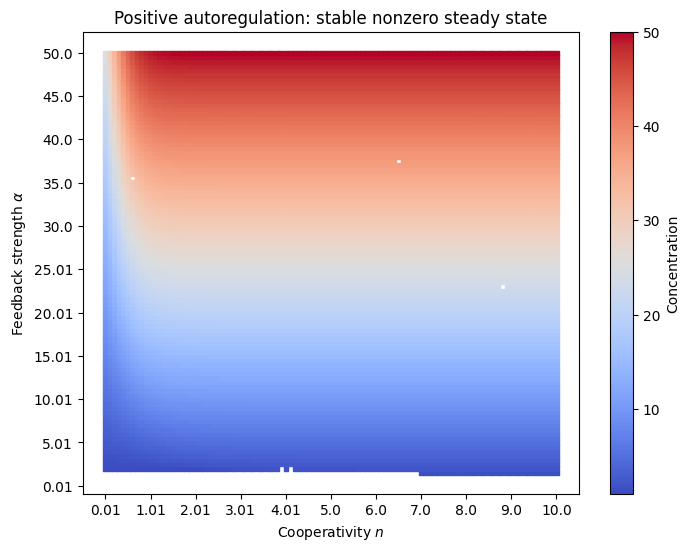

In [ ]:
# Create meshgrid coordinates
x = np.arange(grid.shape[1])
y = np.arange(grid.shape[0])
x, y = np.meshgrid(x, y)

# Flatten the arrays for plotting
x = x.flatten()
y = y.flatten()
z = grid.flatten()  # Values to be used for color mapping

# Create scatter plot as heatmap
plt.figure(figsize=(8, 6))
sc = plt.scatter(x, y, c=z, s=10, cmap='coolwarm', marker='s')  # 's' for square marker

# Make labels
xticks=np.arange(n_no)[::5]
xlabels=n_vals[::5]
xlabels=[round(x, 2) for x in xlabels]
yticks=np.arange(a_no)[::5]
ylabels=a_vals[::5]
ylabels=[round(x, 2) for x in ylabels]

# Plot labels
plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)

# Cosmetic
plt.colorbar(sc, label='Concentration')
plt.title('Positive autoregulation: stable nonzero steady state')
plt.xlabel(r'Cooperativity $n$')
plt.ylabel(r'Feedback strength $\alpha$')

# Use MaxNLocator to set the number of ticks on the x-axis
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(MaxNLocator(11))  # Change 10 to the desired number of ticks
ax.yaxis.set_major_locator(MaxNLocator(11))  # Change 10 to the desired number of ticks

plt.show()

Substituting numerical fixed points into analytical sensitivity function:

In [ ]:
# Define analytical expression for s_a(xss)

def S_a_xss_analytic(xss, a, n):
    numer = 1 + xss**n
    denom = 1 - n + xss**n
    sensitivity = numer/denom
    return abs(sensitivity)

In [ ]:
# Initialise grid to stare data
GRID = np.zeros((a_no,n_no))

In [ ]:
# evaluate sensitivity at grid
for i in range(len(a_vals)):

  for j in range(len(n_vals)):

    a_val   = a_vals[i]
    n_val   = n_vals[j]
    xss_val = grid[i,j]

    GRID[i,j] = S_a_xss_analytic(xss_val, a_val, n_val)

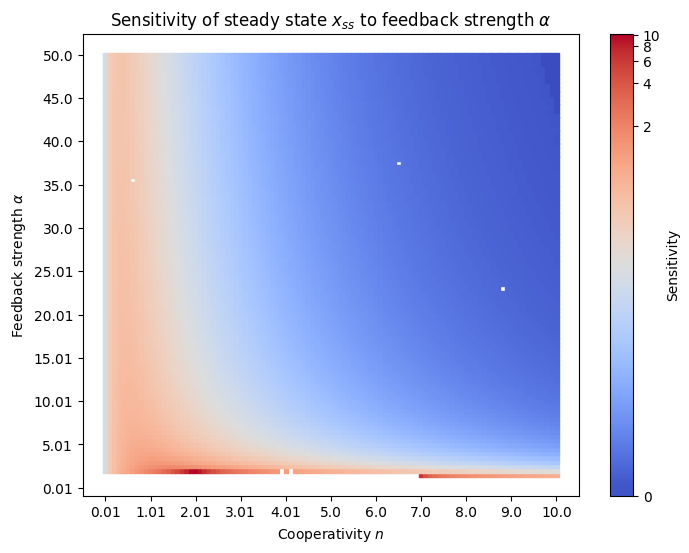

In [ ]:
# Create meshgrid coordinates
x = np.arange(GRID.shape[1])
y = np.arange(GRID.shape[0])
x, y = np.meshgrid(x, y)

# Flatten the arrays for plotting
x = x.flatten()
y = y.flatten()
z = GRID.flatten()  # Values to be used for color mapping

# Create scatter plot as heatmap
plt.figure(figsize=(8, 6))
# sc = plt.scatter(x, y, c=z, s=10, cmap='coolwarm', marker='s', norm = colors.LogNorm())  # 's' for square marker
sc = plt.scatter(x, y, c=z, s=10, cmap='coolwarm', marker='s', norm = colors.PowerNorm(gamma=0.1))  # 's' for square marker

# Make labels
xticks=np.arange(n_no)[::5]
xlabels=n_vals[::5]
xlabels=[round(x, 2) for x in xlabels]
yticks=np.arange(a_no)[::5]
ylabels=a_vals[::5]
ylabels=[round(x, 2) for x in ylabels]

# Plot labels
plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)

# Cosmetic
plt.colorbar(sc, label='Sensitivity')
plt.title(r'Sensitivity of steady state $x_{ss}$ to feedback strength $\alpha$')
plt.xlabel(r'Cooperativity $n$')
plt.ylabel(r'Feedback strength $\alpha$')

# Use MaxNLocator to set the number of ticks on the x-axis
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(MaxNLocator(11))  # Change 10 to the desired number of ticks
ax.yaxis.set_major_locator(MaxNLocator(11))  # Change 10 to the desired number of ticks

plt.show()

In [ ]:
# ------------------------------

In [ ]:
# Define analytical expression for s_n(xss)

def S_n_xss_analytic(xss, a, n):
    numer = n * np.log(xss)
    denom = 1 - n + xss**n
    sensitivity = numer/denom
    return abs(sensitivity)

In [ ]:
# Initialise grid
GRID2 = np.zeros((a_no,n_no))

In [ ]:
# evaluate sensitivity at grid
for i in range(len(a_vals)):

  for j in range(len(n_vals)):

    a_val   = a_vals[i]
    n_val   = n_vals[j]
    xss_val = grid[i,j]

    GRID2[i,j] = S_n_xss_analytic(xss_val, a_val, n_val)

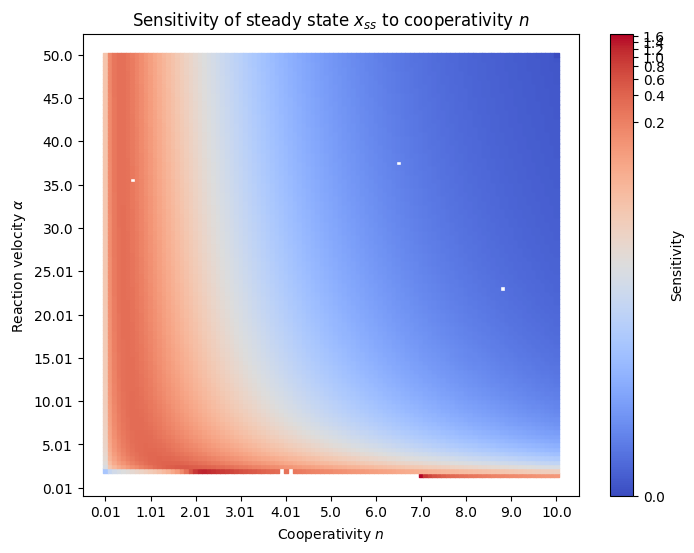

In [ ]:
# Create meshgrid coordinates
x = np.arange(GRID2.shape[1])
y = np.arange(GRID2.shape[0])
x, y = np.meshgrid(x, y)

# Flatten the arrays for plotting
x = x.flatten()
y = y.flatten()
z = GRID2.flatten()  # Values to be used for color mapping

# Create scatter plot as heatmap
plt.figure(figsize=(8, 6))
# sc = plt.scatter(x, y, c=z, s=10, cmap='coolwarm', marker='s', norm = colors.LogNorm())  # 's' for square marker
sc = plt.scatter(x, y, c=z, s=10, cmap='coolwarm', marker='s', norm = colors.PowerNorm(gamma=0.1))  # 's' for square marker

# Make labels
xticks=np.arange(n_no)[::5]
xlabels=n_vals[::5]
xlabels=[round(x, 2) for x in xlabels]
yticks=np.arange(a_no)[::5]
ylabels=a_vals[::5]
ylabels=[round(x, 2) for x in ylabels]

# Plot labels
plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)

# Cosmetic
plt.colorbar(sc, label='Sensitivity')
plt.title(r'Sensitivity of steady state $x_{ss}$ to cooperativity $n$')
plt.xlabel(r'Cooperativity $n$')
plt.ylabel(r'Reaction velocity $\alpha$')

# Use MaxNLocator to set the number of ticks on the x-axis
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(MaxNLocator(11))  # Change 10 to the desired number of ticks
ax.yaxis.set_major_locator(MaxNLocator(11))  # Change 10 to the desired number of ticks

plt.show()



---


# **PARETO FRONT**

In [ ]:
pip install paretoset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 3.2 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 21.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00
  Attempting unins

In [ ]:
# Python preliminary
from paretoset import paretoset
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.5f}'.format

In [ ]:
# Create parameter space

ParamSpace = pd.DataFrame({"a": [],
                           "n": []})

for a_val in a_vals:
  for n_val in n_vals:
    new_row = pd.DataFrame({"a": [a_val],
                            "n": [n_val]})
    ParamSpace = pd.concat([ParamSpace, new_row], ignore_index=True)

# Create sensitivity space

SensSpace = pd.DataFrame({"S_a_xss": [],
                          "S_n_xss": []})

for a_pos in range(len(a_vals)):
  for n_pos in range(len(n_vals)):
    S_a_xss_val =  GRID[a_pos,n_pos]
    S_n_xss_val = GRID2[a_pos,n_pos]
    new_row = pd.DataFrame({"S_a_xss": [S_a_xss_val],
                            "S_n_xss": [S_n_xss_val]})
    SensSpace = pd.concat([SensSpace, new_row], ignore_index=True)

In [ ]:
# There may be NaNs in the dataframe. The minimisation will find the NaNs. We don't want this.
# Let's replace NaNs with infinity. This is fine because we only care about the smallest numbers.

SensSpace = SensSpace.fillna(np.inf)

In [ ]:
# Run the Pareto front tool on the sensitivity space

mask = paretoset(SensSpace, sense=["min", "min"])
paretoset_SensSpace = SensSpace[mask]

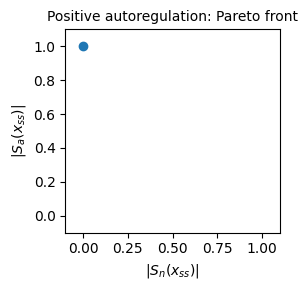

In [ ]:
# Lists Sx and Sy
S_n_xss = SensSpace['S_n_xss'].tolist()
S_a_xss = SensSpace['S_a_xss'].tolist()

# Pareto optimal points (revised)
pareto_S_n_xss_values = paretoset_SensSpace['S_n_xss'].tolist()
pareto_S_a_xss_values = paretoset_SensSpace['S_a_xss'].tolist()

# Plotting
plt.figure(figsize=(3, 3))

# Plot all data points
# plt.scatter(S_n_xss, S_a_xss, alpha=0.5)

# Highlight Pareto front points
plt.scatter(pareto_S_n_xss_values, pareto_S_a_xss_values)

# Adding labels and title
plt.xlabel(r'$|S_{n}(x_{ss})|$',fontsize=10)
plt.ylabel(r'$|S_{a}(x_{ss})|$',fontsize=10)
plt.title('Positive autoregulation: Pareto front',fontsize=10)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)


# Show plot
plt.tight_layout()
plt.savefig("posar_main.pdf", dpi=600, bbox_inches='tight')
plt.show()

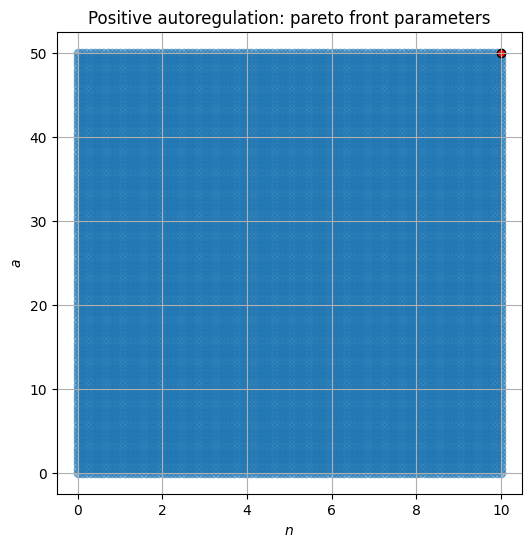

In [ ]:
# Indices of Pareto optimal points
pareto_indices = paretoset_SensSpace.index.tolist()

# Lists x and y
n = ParamSpace['n'].tolist()
a = ParamSpace['a'].tolist()

# All points in (a,n) space
all_pairs = list(zip(n,a))

# Get the corresponding pairs from lists a and n
pareto_points = [(n[i], a[i]) for i in pareto_indices]

# Convert pairs to separate lists for plotting
n_values, a_values = zip(*all_pairs)
pareto_n_values, pareto_a_values = zip(*pareto_points)

# Plotting
plt.figure(figsize=(6, 6))

# Plot all data points
plt.scatter(n_values, a_values, alpha=0.5)

# Highlight Pareto front points
plt.scatter(pareto_n_values, pareto_a_values, color='red', edgecolor='black')

# Adding labels and title
plt.xlabel(r'$n$')
plt.ylabel(r'$a$')
plt.title('Positive autoregulation: pareto front parameters')
plt.grid(True)

# Show plot
plt.show()